**1. Kita Import Untuk Persiapan Data**

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

Mencari Data atau membuat Data set yang ada:

In [139]:
dataSet = pd.read_csv('/content/[Dataset]_Test_(Perawatan-Pesawat).csv')
dataSet.shape

(100, 71)

Memastikan dan melihat colums sudah sesuai:

In [140]:
print("Columns in the dataset:", dataSet.columns)

Columns in the dataset: Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3',
       'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12',
       'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21',
       'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10',
       'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19',
       'sd20', 'sd21', 'ttf', 'label_bnc', 'label_mcc'],
      dtype='object')


Mengasumsikan colomn ttf itu menunjukan Waktu Kegagalan :

In [141]:
target_column = 'ttf'

Menangani Nilia yang Hilang :

In [142]:
dataSet.fillna(method='ffill', inplace=True)

In [143]:
# Define feature columns
feature_columns = ['cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]

In [144]:
# Store feature column names for later use
stored_feature_columns = feature_columns.copy()

In [145]:
# Print feature columns used during training
print("Feature columns used during training:", stored_feature_columns)

Feature columns used during training: ['cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [146]:
missing_columns = [col for col in feature_columns if col not in dataSet.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
else:
    print("All feature columns are present in the dataset.")

All feature columns are present in the dataset.


Menerapkan Fitur atau penskalaan fitur:

In [147]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataSet[feature_columns])

Pemisahaan Data:

In [150]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, dataSet[target_column], test_size=0.2, random_state=42)

Mengubah Target menjadi Numpy:

In [151]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# 2. Membuat Model Deep Learning

Membuat Model

In [152]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

Menyusun Model

In [153]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Melatih Model

In [154]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 1s 34ms/step - loss: 7814.4521 - mean_squared_error: 7814.4521 - val_loss: 6671.0942 - val_mean_squared_error: 6671.0942
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 7751.0781 - mean_squared_error: 7751.0781 - val_loss: 6604.0332 - val_mean_squared_error: 6604.0332
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 7685.6650 - mean_squared_error: 7685.6650 - val_loss: 6533.8730 - val_mean_squared_error: 6533.8730
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 7609.7856 - mean_squared_error: 7609.7856 - val_loss: 6450.1216 - val_mean_squared_error: 6450.1216
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 7515.9409 - mean_squared_error: 7515.9409 - val_loss: 6347.4868 - val_mean_squared_error: 6347.4868
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 7405.5273 - mean_squared_error: 7405.5273 - val_loss: 6218.3569 - val_mean_sq

# 3. Evaluasi Model

Evaluasi kinerja model pada dataset

In [155]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 92ms/step


Kesalahan Kuadrat

In [156]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1542.4815450122098


Perdiksi Antara plot dengan Sebenernya

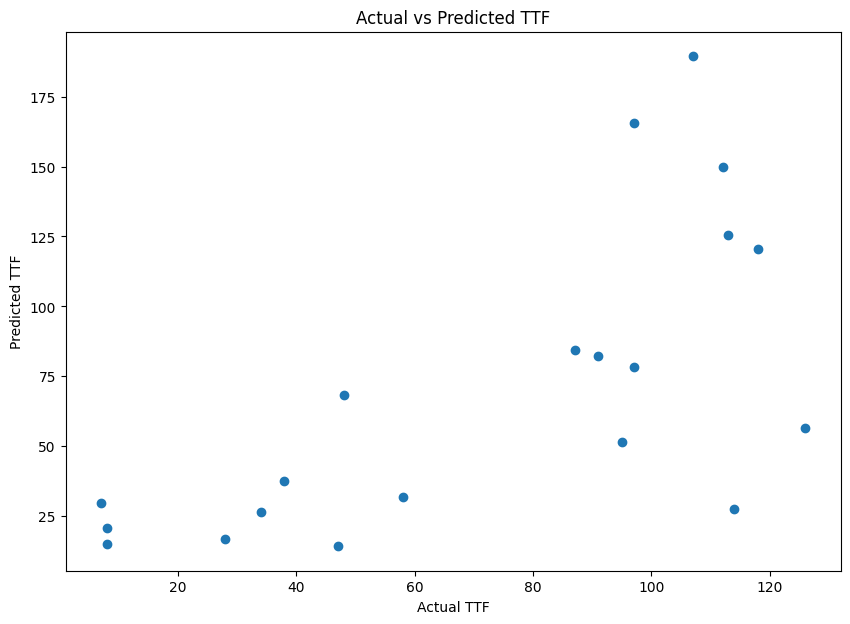

In [157]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TTF')
plt.ylabel('Predicted TTF')
plt.title('Actual vs Predicted TTF')
plt.show()

# 4. Visualisai Hasil

Nilai MSE pelatihan dan Validasi nya

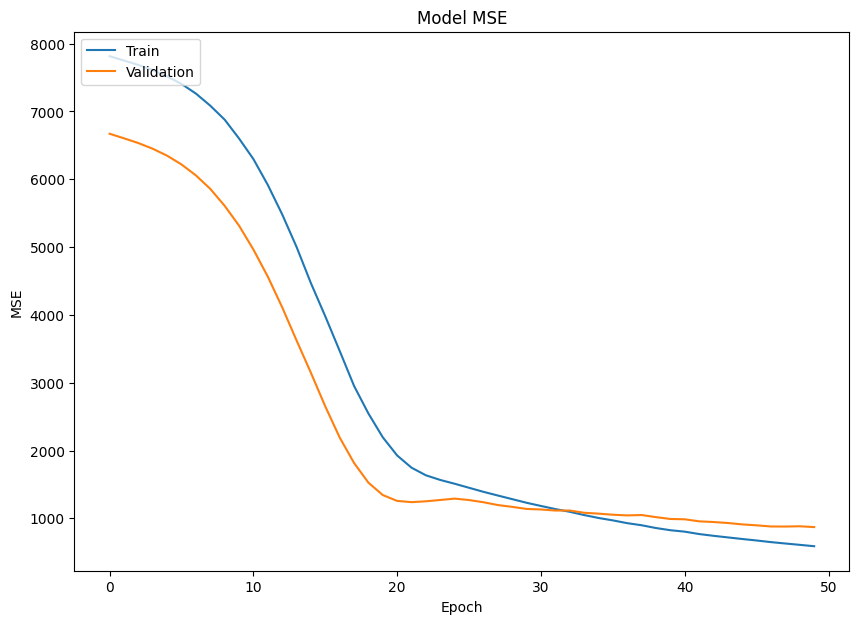

In [158]:
plt.figure(figsize=(10,7))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Nilai kerugian Pelatihan dan Validasi

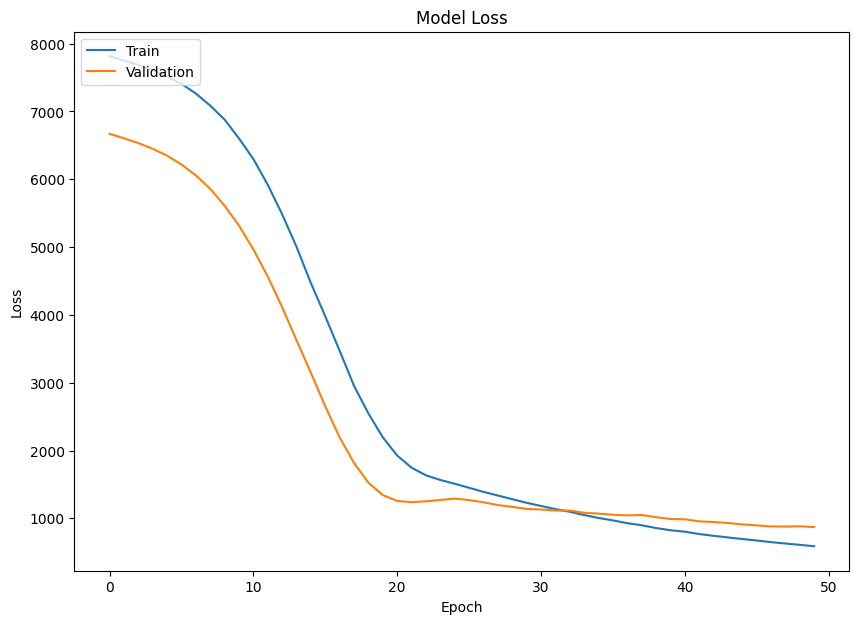

In [159]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 5.Antarmuka Pengguna untuk Prediksi

Fungsi untuk melakukan prediksi berdasarkan input pengguna

In [160]:
def predict_maintenance(engine_id, cycle, op_setting1, op_setting2, op_setting3, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21):
    # Membuat DataFrame dari input
    input_data = pd.DataFrame({
        'cycle': [cycle],
        'op_setting1': [op_setting1],
        'op_setting2': [op_setting2],
        'op_setting3': [op_setting3],
        's1': [s1], 's2': [s2], 's3': [s3], 's4': [s4], 's5': [s5],
        's6': [s6], 's7': [s7], 's8': [s8], 's9': [s9], 's10': [s10],
        's11': [s11], 's12': [s12], 's13': [s13], 's14': [s14], 's15': [s15],
        's16': [s16], 's17': [s17], 's18': [s18], 's19': [s19], 's20': [s20],
        's21': [s21]
    })

    # Print feature columns used during prediction
    print("Feature columns used during prediction:", input_data.columns.tolist())

    # Ensure the columns are in the same order as during training
    input_data = input_data[stored_feature_columns]

    # Melakukan feature scaling
    input_data_scaled = scaler.transform(input_data)

    # Melakukan prediksi
    prediction = model.predict(input_data_scaled)
    return prediction[0][0]

# Membuat widget untuk input pengguna
engine_id_input = widgets.IntText(description="id:")
cycle_input = widgets.IntText(description="cycle:")
op_setting1_input = widgets.FloatText(description="Setting 1:")
op_setting2_input = widgets.FloatText(description="Setting 2:")
op_setting3_input = widgets.FloatText(description="Setting 3:")
sensor_inputs = [widgets.FloatText(description=f"s{i+1}:") for i in range(21)]

# Tombol untuk melakukan prediksi
predict_button = widgets.Button(description="Predict")

# Fungsi untuk menampilkan hasil prediksi
def on_predict_button_clicked(b):
    result = predict_maintenance(
        engine_id_input.value,
        cycle_input.value,
        op_setting1_input.value,
        op_setting2_input.value,
        op_setting3_input.value,
        *[sensor_input.value for sensor_input in sensor_inputs]
    )
    print(f"Predicted Time to Failure (TTF): {result}")

predict_button.on_click(on_predict_button_clicked)

# Menampilkan widget
display(engine_id_input, cycle_input, op_setting1_input, op_setting2_input, op_setting3_input, *sensor_inputs, predict_button)


IntText(value=0, description='id:')

IntText(value=0, description='cycle:')

FloatText(value=0.0, description='Setting 1:')

FloatText(value=0.0, description='Setting 2:')

FloatText(value=0.0, description='Setting 3:')

FloatText(value=0.0, description='s1:')

FloatText(value=0.0, description='s2:')

FloatText(value=0.0, description='s3:')

FloatText(value=0.0, description='s4:')

FloatText(value=0.0, description='s5:')

FloatText(value=0.0, description='s6:')

FloatText(value=0.0, description='s7:')

FloatText(value=0.0, description='s8:')

FloatText(value=0.0, description='s9:')

FloatText(value=0.0, description='s10:')

FloatText(value=0.0, description='s11:')

FloatText(value=0.0, description='s12:')

FloatText(value=0.0, description='s13:')

FloatText(value=0.0, description='s14:')

FloatText(value=0.0, description='s15:')

FloatText(value=0.0, description='s16:')

FloatText(value=0.0, description='s17:')

FloatText(value=0.0, description='s18:')

FloatText(value=0.0, description='s19:')

FloatText(value=0.0, description='s20:')

FloatText(value=0.0, description='s21:')

Button(description='Predict', style=ButtonStyle())

Feature columns used during prediction: ['cycle', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


KeyError: "['setting1', 'setting2', 'setting3'] not in index"